In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objects as go
plt.rcParams['figure.figsize']=17,8

import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import folium

In [3]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [4]:
df=pd.read_excel(r"F:\COVID-19-Data-Analyisis\Covid cases in India.xlsx")

In [5]:
df

,S. No.,Name of State / UT,Total Confirmed cases,Cured / Discharged / Migrated,Death
0,1,Andaman and Nicobar Islands,33,16,0
1,2,Andhra Pradesh,1463,403,33
2,3,Arunachal Pradesh,1,1,0
3,4,Assam,42,29,1
4,5,Bihar,426,82,2
5,6,Chandigarh,56,17,0
6,7,Chhattisgarh,40,36,0
7,8,Delhi,3515,1094,59
8,9,Goa,7,7,0
9,10,Gujarat,4395,613,214


In [6]:
df.drop(['S. No.'],axis=1,inplace=True)                                                        

In [7]:
df

,Name of State / UT,Total Confirmed cases,Cured / Discharged / Migrated,Death
0,Andaman and Nicobar Islands,33,16,0
1,Andhra Pradesh,1463,403,33
2,Arunachal Pradesh,1,1,0
3,Assam,42,29,1
4,Bihar,426,82,2
5,Chandigarh,56,17,0
6,Chhattisgarh,40,36,0
7,Delhi,3515,1094,59
8,Goa,7,7,0
9,Gujarat,4395,613,214


In [8]:
total_Death=df['Death'].sum()
print('The total Death till now in India is ',total_Death)

The total Death till now in India is  1152


In [9]:
total_confirmed_cases = df['Total Confirmed cases'].sum()
print('The total confirmed cases in India till now is ',total_confirmed_cases)

The total confirmed cases in India till now is  34972


In [10]:
df['Total Active Cases'] = df['Total Confirmed cases'] - df['Cured / Discharged / Migrated'] - df['Death']

In [11]:
df

,Name of State / UT,Total Confirmed cases,Cured / Discharged / Migrated,Death,Total Active Cases
0,Andaman and Nicobar Islands,33,16,0,17
1,Andhra Pradesh,1463,403,33,1027
2,Arunachal Pradesh,1,1,0,0
3,Assam,42,29,1,12
4,Bihar,426,82,2,342
5,Chandigarh,56,17,0,39
6,Chhattisgarh,40,36,0,4
7,Delhi,3515,1094,59,2362
8,Goa,7,7,0,0
9,Gujarat,4395,613,214,3568


In [12]:
total_acive_cases = df['Total Active Cases'].sum()
print('Total Active cases in India are ',total_acive_cases)

Total Active cases in India are  24755


In [13]:
df = df.rename(columns = {'Total Active Cases':'Active Cases'})

In [14]:
df

,Name of State / UT,Total Confirmed cases,Cured / Discharged / Migrated,Death,Active Cases
0,Andaman and Nicobar Islands,33,16,0,17
1,Andhra Pradesh,1463,403,33,1027
2,Arunachal Pradesh,1,1,0,0
3,Assam,42,29,1,12
4,Bihar,426,82,2,342
5,Chandigarh,56,17,0,39
6,Chhattisgarh,40,36,0,4
7,Delhi,3515,1094,59,2362
8,Goa,7,7,0,0
9,Gujarat,4395,613,214,3568


In [15]:
df.style.background_gradient(cmap='Reds')

,Name of State / UT,Total Confirmed cases,Cured / Discharged / Migrated,Death,Active Cases
0,Andaman and Nicobar Islands,33,16,0,17
1,Andhra Pradesh,1463,403,33,1027
2,Arunachal Pradesh,1,1,0,0
3,Assam,42,29,1,12
4,Bihar,426,82,2,342
5,Chandigarh,56,17,0,39
6,Chhattisgarh,40,36,0,4
7,Delhi,3515,1094,59,2362
8,Goa,7,7,0,0
9,Gujarat,4395,613,214,3568


In [16]:
tottal_active_case = df.groupby('Name of State / UT',)['Active Cases'].sum().sort_values(ascending = False).to_frame()

In [17]:
tottal_active_case

,Active Cases
Name of State / UT,
Maharashtra,8266
Gujarat,3568
Delhi,2362
Madhya Pradesh,2100
Rajasthan,1690
Uttar Pradesh,1685
Tamil Nadu,1038
Andhra Pradesh,1027
West Bengal,623


In [18]:
tottal_active_case.style.background_gradient(cmap='Reds')

,Active Cases
Name of State / UT,
Maharashtra,8266
Gujarat,3568
Delhi,2362
Madhya Pradesh,2100
Rajasthan,1690
Uttar Pradesh,1685
Tamil Nadu,1038
Andhra Pradesh,1027
West Bengal,623


In [19]:
################# Graphical Represantaion ##########################

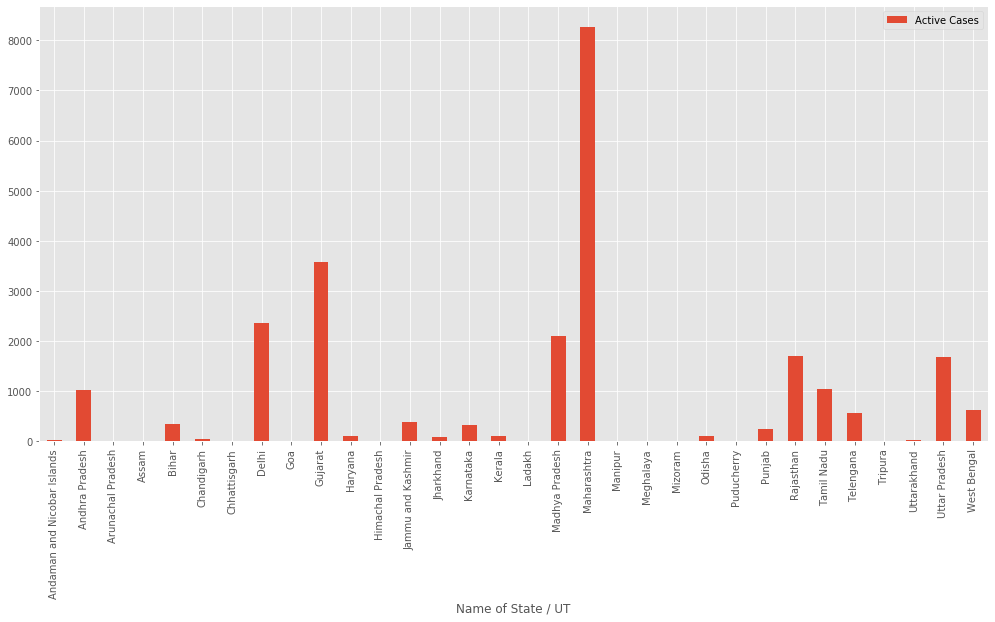

In [20]:
#Pandas Graphical Represantaion
df.plot(kind='bar',x='Name of State / UT',y='Active Cases')
plt.show()

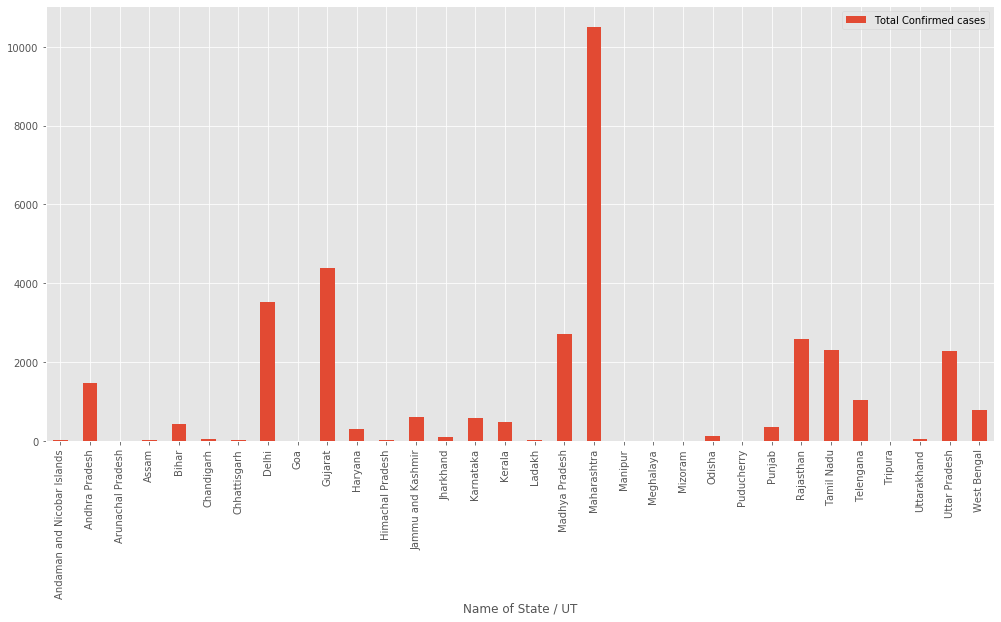

In [21]:
df.plot(kind='bar',x='Name of State / UT',y='Total Confirmed cases')
plt.show()

In [42]:
#Plotly Graphical Represantaion (Interactive Plot)
df.iplot(kind='bar',x='Name of State / UT',y='Active Cases',title='Active Cases in India', xTitle='Name of State / UT',yTitle='Active Cases')

In [23]:
df.iplot(kind='bar',x='Name of State / UT',y='Total Confirmed cases',colors='crimson',title='Total Confirmed Cases in India',xTitle='Name of State / UT', yTitle='Total Confirmed cases',)


In [24]:
px.bar(df,x='Name of State / UT',y='Active Cases')

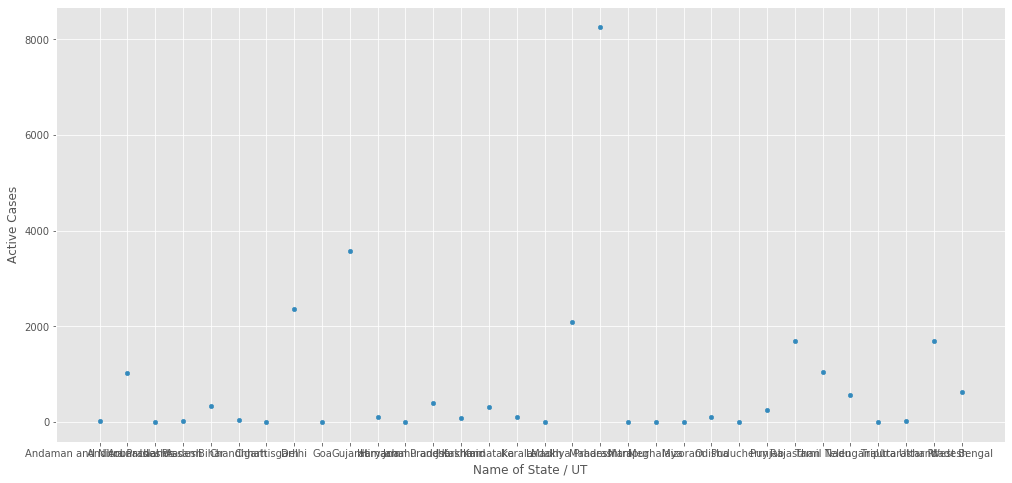

In [25]:
df.plot(kind='scatter',x='Name of State / UT',y='Active Cases')

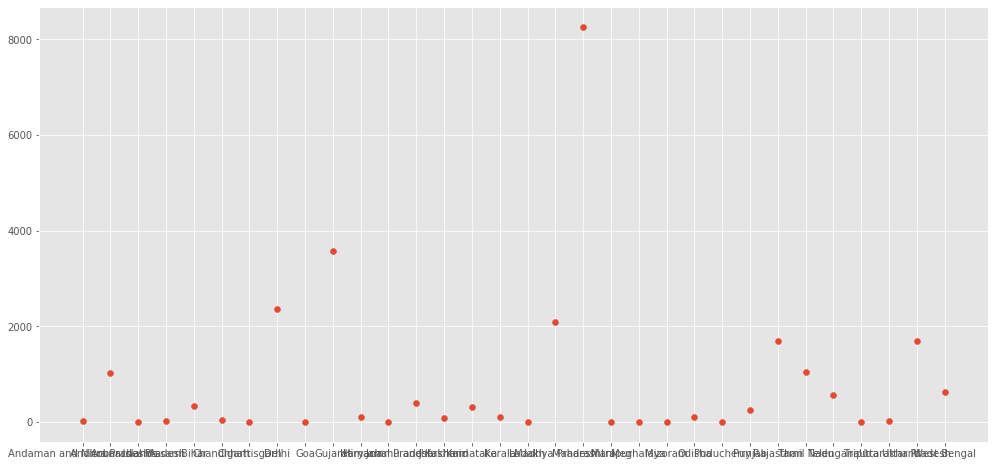

In [26]:
plt.scatter(df['Name of State / UT'],df['Active Cases'])

In [27]:
#without markers
df.iplot(kind='scatter',x='Name of State / UT',y='Active Cases',xTitle='Name of State / UT', yTitle='Active Cases',title='Covid19 Data Analysis (Active Cases)', colors='darkblue')

In [43]:
#With markers
df.iplot(kind='scatter',x='Name of State / UT',y='Active Cases',xTitle='Name of State / UT', yTitle='Active Cases',title='Covid19 Data Analysis (Active Cases)', colors='magenta',mode='markers+lines')

In [29]:
df.iplot(kind='scatter',x='Name of State / UT',y='Cured / Discharged / Migrated',xTitle='Name of State / UT', yTitle='Cured / Discharged / Migrated',title='Cured / Discharged / Migrated (In numbers)', colors='darkgreen')

In [30]:
df['Cured Percentage'] = (df['Cured / Discharged / Migrated']/df['Total Confirmed cases'])*100

In [31]:
df.round(2)

,Name of State / UT,Total Confirmed cases,Cured / Discharged / Migrated,Death,Active Cases,Cured Percentage
0,Andaman and Nicobar Islands,33,16,0,17,48.48
1,Andhra Pradesh,1463,403,33,1027,27.55
2,Arunachal Pradesh,1,1,0,0,100.00
3,Assam,42,29,1,12,69.05
4,Bihar,426,82,2,342,19.25
5,Chandigarh,56,17,0,39,30.36
6,Chhattisgarh,40,36,0,4,90.00
7,Delhi,3515,1094,59,2362,31.12
8,Goa,7,7,0,0,100.00
9,Gujarat,4395,613,214,3568,13.95


In [46]:
df.iplot(kind='bar', x='Name of State / UT',y='Cured Percentage',colors='limegreen',title='Cured / Discharged / Migrated (In Percentage)',xTitle='Name of State / UT', yTitle='Cured / Discharged / Migrated')

In [33]:
#oo vis Total Cases

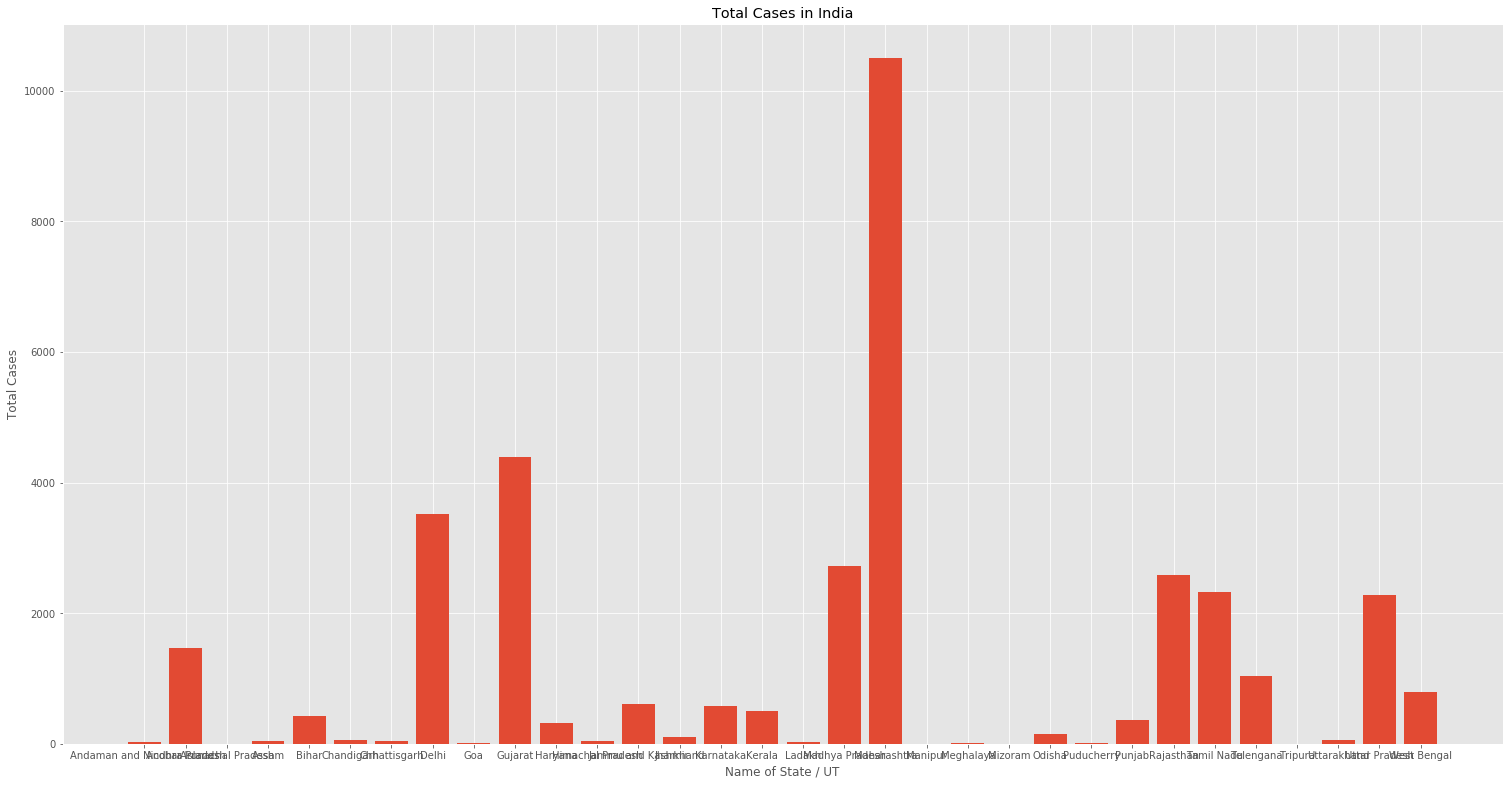

In [34]:
#Matplotlib
fig=plt.figure(figsize=(20,10))
axes = fig.add_axes([0,0,1,1])
axes.bar(df['Name of State / UT'],df['Total Confirmed cases'])
axes.set_title("Total Cases in India")
axes.set_xlabel("Name of State / UT")
axes.set_ylabel("Total Cases")
plt.show()

#Plotly
fig=go.Figure()
fig.add_trace(go.Bar(x=df['Name of State / UT'],y=df['Total Confirmed cases']))
fig.update_layout(title='Total Cases in India',xaxis=dict(title='Name of State / UT'),yaxis=dict(title='Total Cases'))

In [35]:
indian_cord = pd.read_excel(r"F:\COVID-19-Data-Analyisis\Indian Coordinates.xlsx")

In [36]:
indian_cord

,Name of State / UT,Latitude,Longitude
0,Andaman and Nicobar Islands,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973
5,Chandigarh,30.719997,76.780006
6,Chhattisgarh,22.090420,82.159987
7,Delhi,28.669993,77.230004
8,Goa,15.491997,73.818001
9,Gujarat,22.258700,71.192400


In [37]:
df_full = pd.merge(indian_cord,df,on='Name of State / UT')

In [38]:
df_full

,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Cured / Discharged / Migrated,Death,Active Cases,Cured Percentage
0,Andaman and Nicobar Islands,11.667026,92.735983,33,16,0,17,48.484848
1,Andhra Pradesh,14.750429,78.570026,1463,403,33,1027,27.546138
2,Arunachal Pradesh,27.100399,93.616601,1,1,0,0,100.000000
3,Assam,26.749981,94.216667,42,29,1,12,69.047619
4,Bihar,25.785414,87.479973,426,82,2,342,19.248826
5,Chandigarh,30.719997,76.780006,56,17,0,39,30.357143
6,Chhattisgarh,22.090420,82.159987,40,36,0,4,90.000000
7,Delhi,28.669993,77.230004,3515,1094,59,2362,31.123755
8,Goa,15.491997,73.818001,7,7,0,0,100.000000
9,Gujarat,22.258700,71.192400,4395,613,214,3568,13.947668


In [39]:
map=folium.Map(location=[20,80],zoom_start=5,tiles='Stamenterrain')
for lat,long,value, name in zip(df_full['Latitude'],df_full['Longitude'],df_full['Total Confirmed cases'],df_full['Name of State / UT']):
    folium.CircleMarker([lat,long],radius=value*0.01,popup=('<strong>State</strong>: '+str(name).capitalize()+'<br>''<strong>Total Cases</strong>: ' + str(value)+ '<br>'),color='red',fill_color='red',fill_opacity=0.3).add_to(map)
    


In [40]:
map